# *Heart Disease Prediction*

This project uses Machine learning techniques to develop a model based on python libraries, which analyses subject's medical report attributes to predict if they have heart disease or not.

## Problem Defination
Using the medical data attributes, can we predict if the patient has heart disease or not

## Data
This dataset (https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset) contains 253,680 survey responses from cleaned BRFSS 2015 (https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system?select=2015.csv) to be used primarily for the binary classification of heart disease. Not that there is strong class imbalance in this dataset. 229,787 respondents do not have/have not had heart disease while 23,893 have had heart disease.

## Features

Some Features and there meaning:

> Age: 1 is 18-24 all the way up to 13 which refers 80 and older. 5 year increments.

> Sex: 0 is Female and 1 is Male

> Smoker: 0 is non-smoker and 1 is smoker

> Stroke : 0 is no Stroke and 1 is Stroke

.... many others.

## Preparing the tools
* We are going to use python Libraries like Matplotlib, Numpy, Pandas to understand and manipulate data.
* Scikit-learn library will be used to import various classification models, and train them on our dataset.
* Various tools like confusion metrics, classification report, precision score, ROC Curve, etc, are used to evaluate our model and compare the performance of various models.

In [ ]:
# Importing visulizing and manupilation tools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
%matplotlib inline

# Pre-processing tools
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Importing models
# Using https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html to understand which models should we use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# As we are also going to use Neural network models so importing necessities
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
import warnings

# Importing libraries needed for model tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Model Evaluations
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import RocCurveDisplay

## Loading Data

Downloading the dataset

In [ ]:
fname = "heart_disease_health_indicators_BRFSS2015.csv.zip"
!gdown  https://drive.google.com/uc?id=1DY762eXcYueJ-hBXg_Tp0zZ_khciZCKX -O {fname}
!unzip -o {fname}
!rm {fname}

Downloading...
From: https://drive.google.com/uc?id=1DY762eXcYueJ-hBXg_Tp0zZ_khciZCKX
To: /content/heart_disease_health_indicators_BRFSS2015.csv.zip
100% 2.79M/2.79M [00:00<00:00, 104MB/s]
Archive:  heart_disease_health_indicators_BRFSS2015.csv.zip
  inflating: heart_disease_health_indicators_BRFSS2015.csv  


In [ ]:
df = pd.read_csv("/content/heart_disease_health_indicators_BRFSS2015.csv")
df.shape # (rows, columns)

(253680, 22)

## Understanding Data

The goal here is to understand the loaded data and plan to perform meaning actions on it if needed.

1. Does the data align with the aim of our project?
2. What kind of data do we have and how do we treat different types?
3. Is the data complete, how we are going to complete it?
4. Where are the outliers and why should you care about them?
5. How can you manupilate features to get better quality data?

In [ ]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Getting information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.tail()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [ ]:
# Checking for any null values in features
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

As we can see that our dataset contains no null values

In [ ]:
# Let's understand the bifercation in the target column (i.e how many have heart disease and not)
df["HeartDiseaseorAttack"].value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

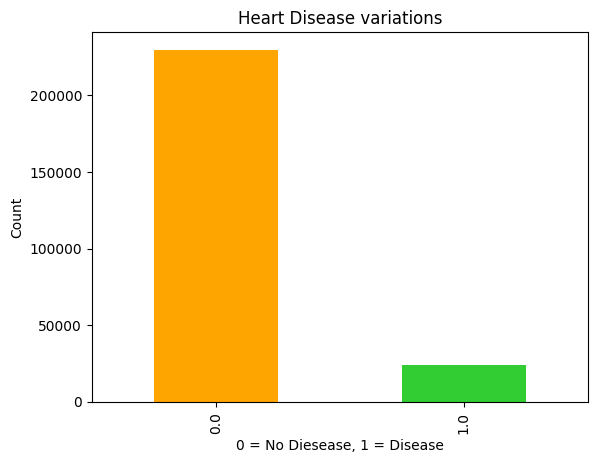

In [ ]:
# Plotting a plot visualize HeartDiseaseorAttack
df["HeartDiseaseorAttack"].value_counts().plot(kind="bar", color=["orange", "limegreen"])
plt.title("Heart Disease variations")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Count");

As seen in the above bar graph there is a high class imbalance

In [ ]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
# Getting the description of data
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Heart Disease variations among women(0.0) and men(1.0)

In [ ]:
df.Sex.value_counts()

0.0    141974
1.0    111706
Name: Sex, dtype: int64

In [ ]:
# Compare HeartDiseaseorAttack column with Sex column
pd.crosstab(df.HeartDiseaseorAttack, df.Sex)

Sex,0.0,1.0
HeartDiseaseorAttack,,
0.0,131769,98018
1.0,10205,13688


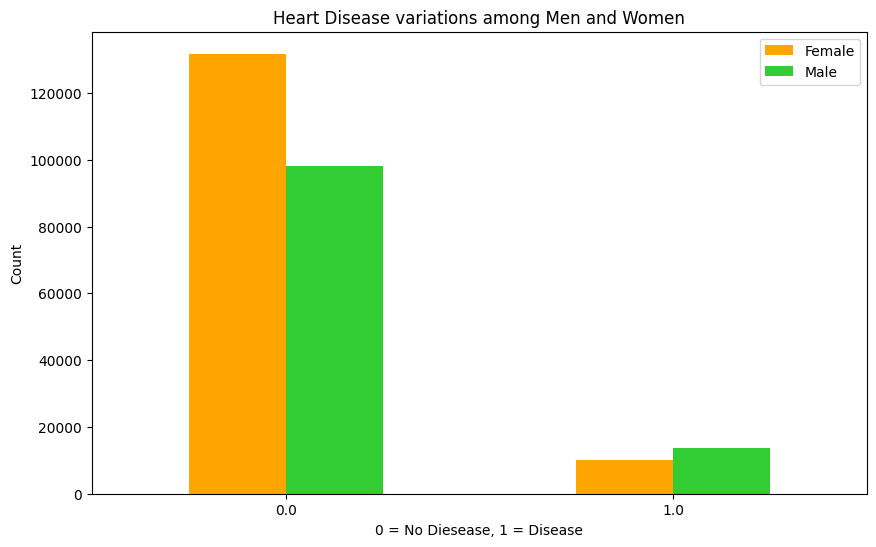

In [ ]:
# Plotting the crosstab HeartDiseaseorAttack with Sex
pd.crosstab(df.HeartDiseaseorAttack, df.Sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["orange", "limegreen"])

plt.title("Heart Disease variations among Men and Women")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

## Comparing Age and BMI

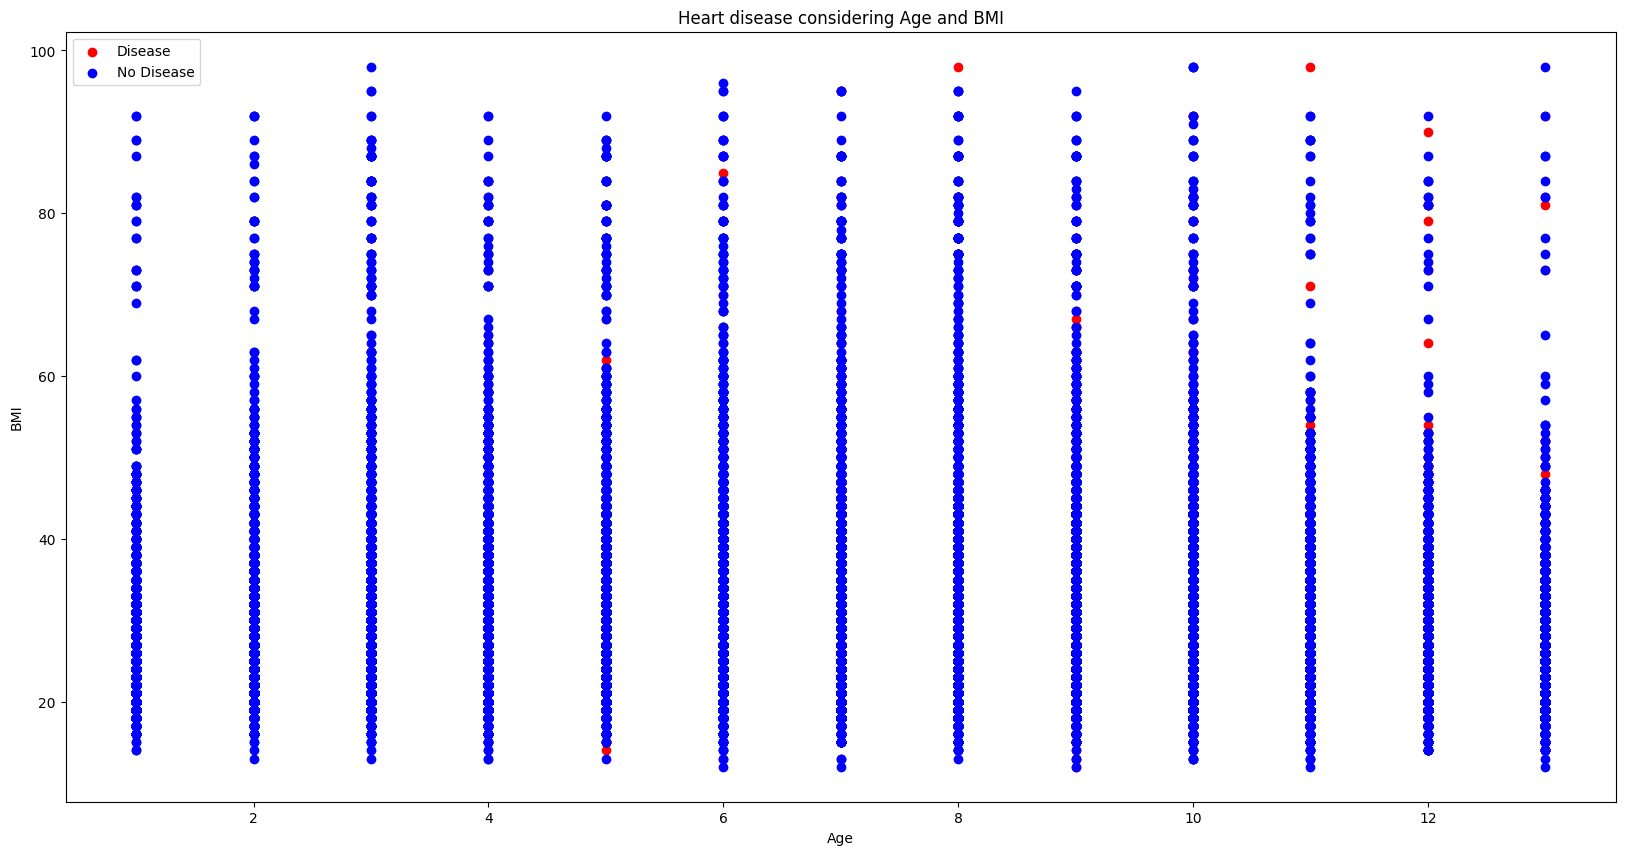

In [ ]:
# Creating figure
plt.figure(figsize = (20,10))

# Positive cases
plt.scatter(df.Age[df.HeartDiseaseorAttack==1],
            df.BMI[df.HeartDiseaseorAttack==1],
            c = "red")

# Negitive cases
plt.scatter(df.Age[df.HeartDiseaseorAttack==0],
            df.BMI[df.HeartDiseaseorAttack==0],
            c = "blue")

# Add some helpful info
plt.title("Heart disease considering Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(["Disease", "No Disease"]);

In [ ]:
# Make a correlation matrix
df.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


(22.6, -0.6)

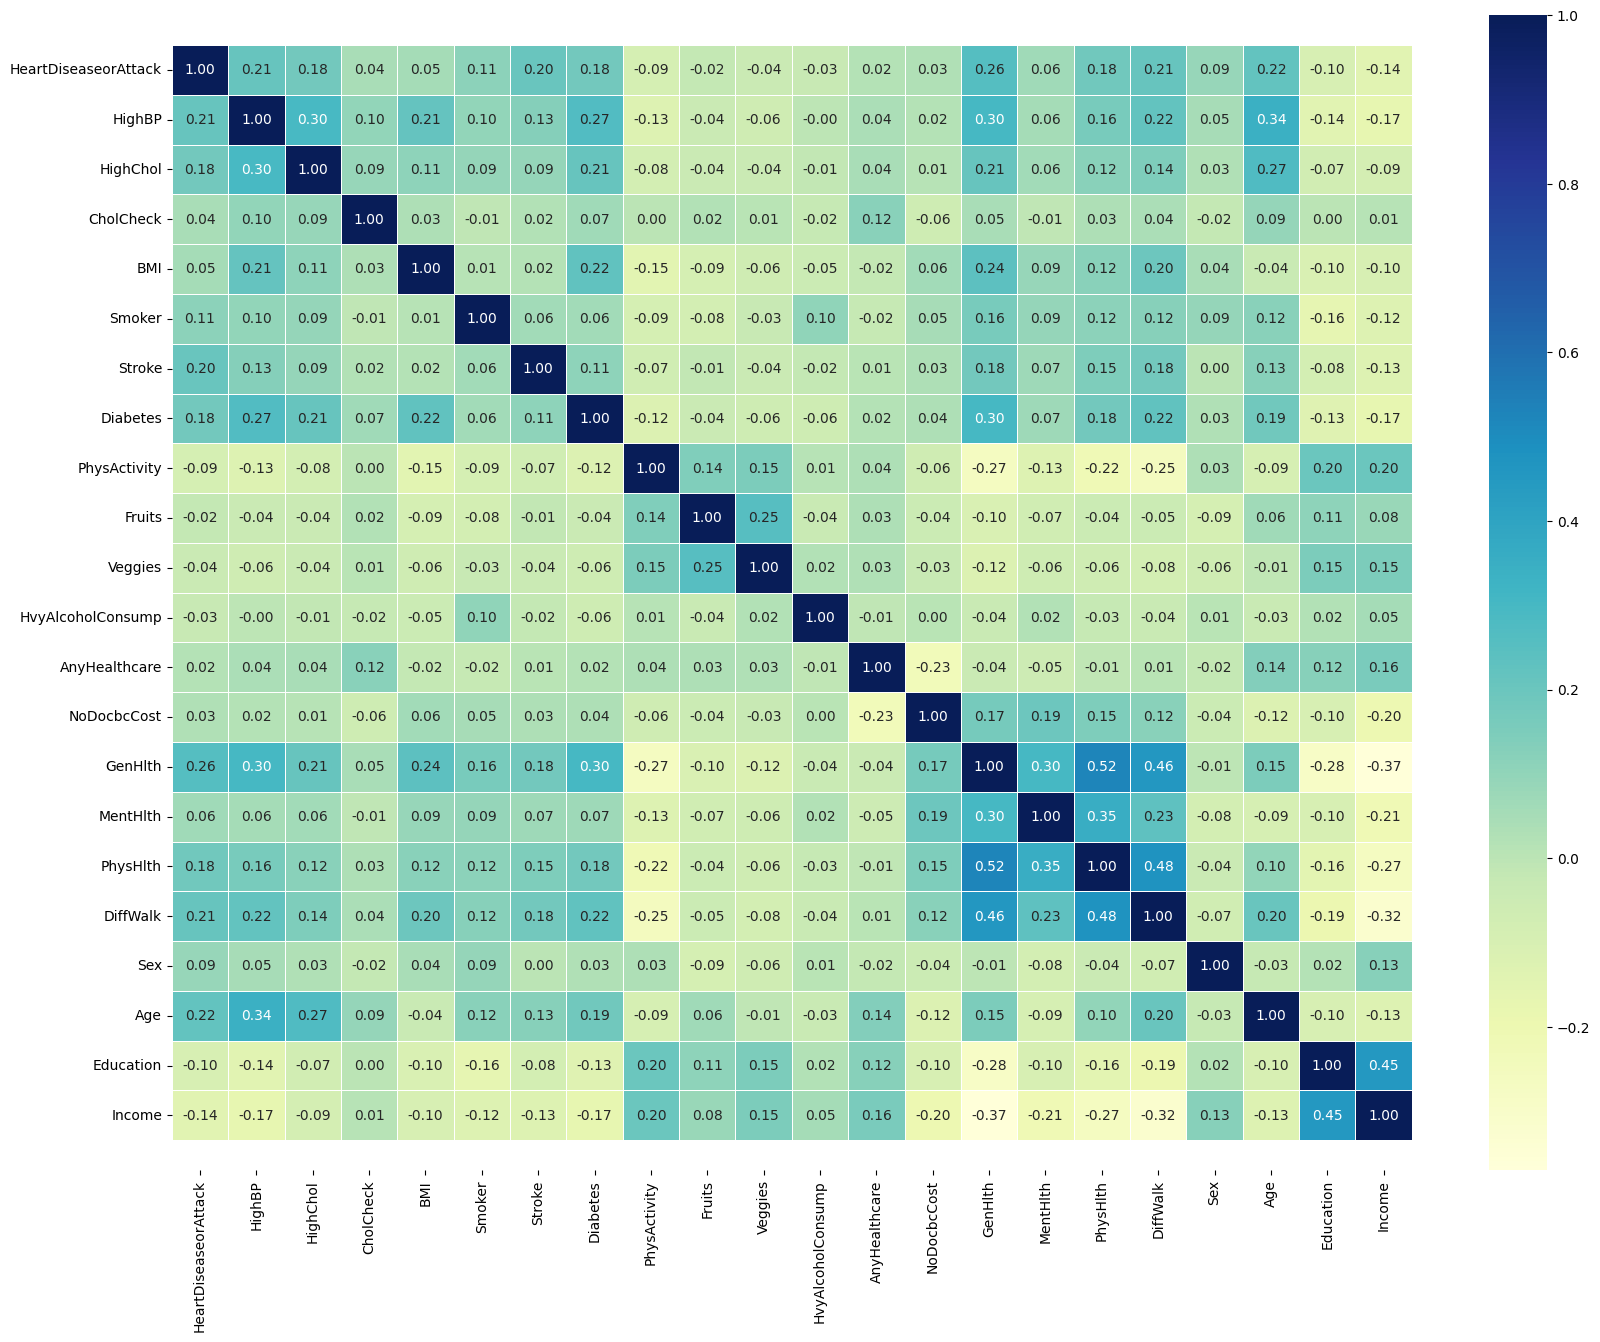

In [ ]:
# Let's plot our correlation matrix
correl_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(correl_matrix,
                 annot=True,
                 linewidths=0.6,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)

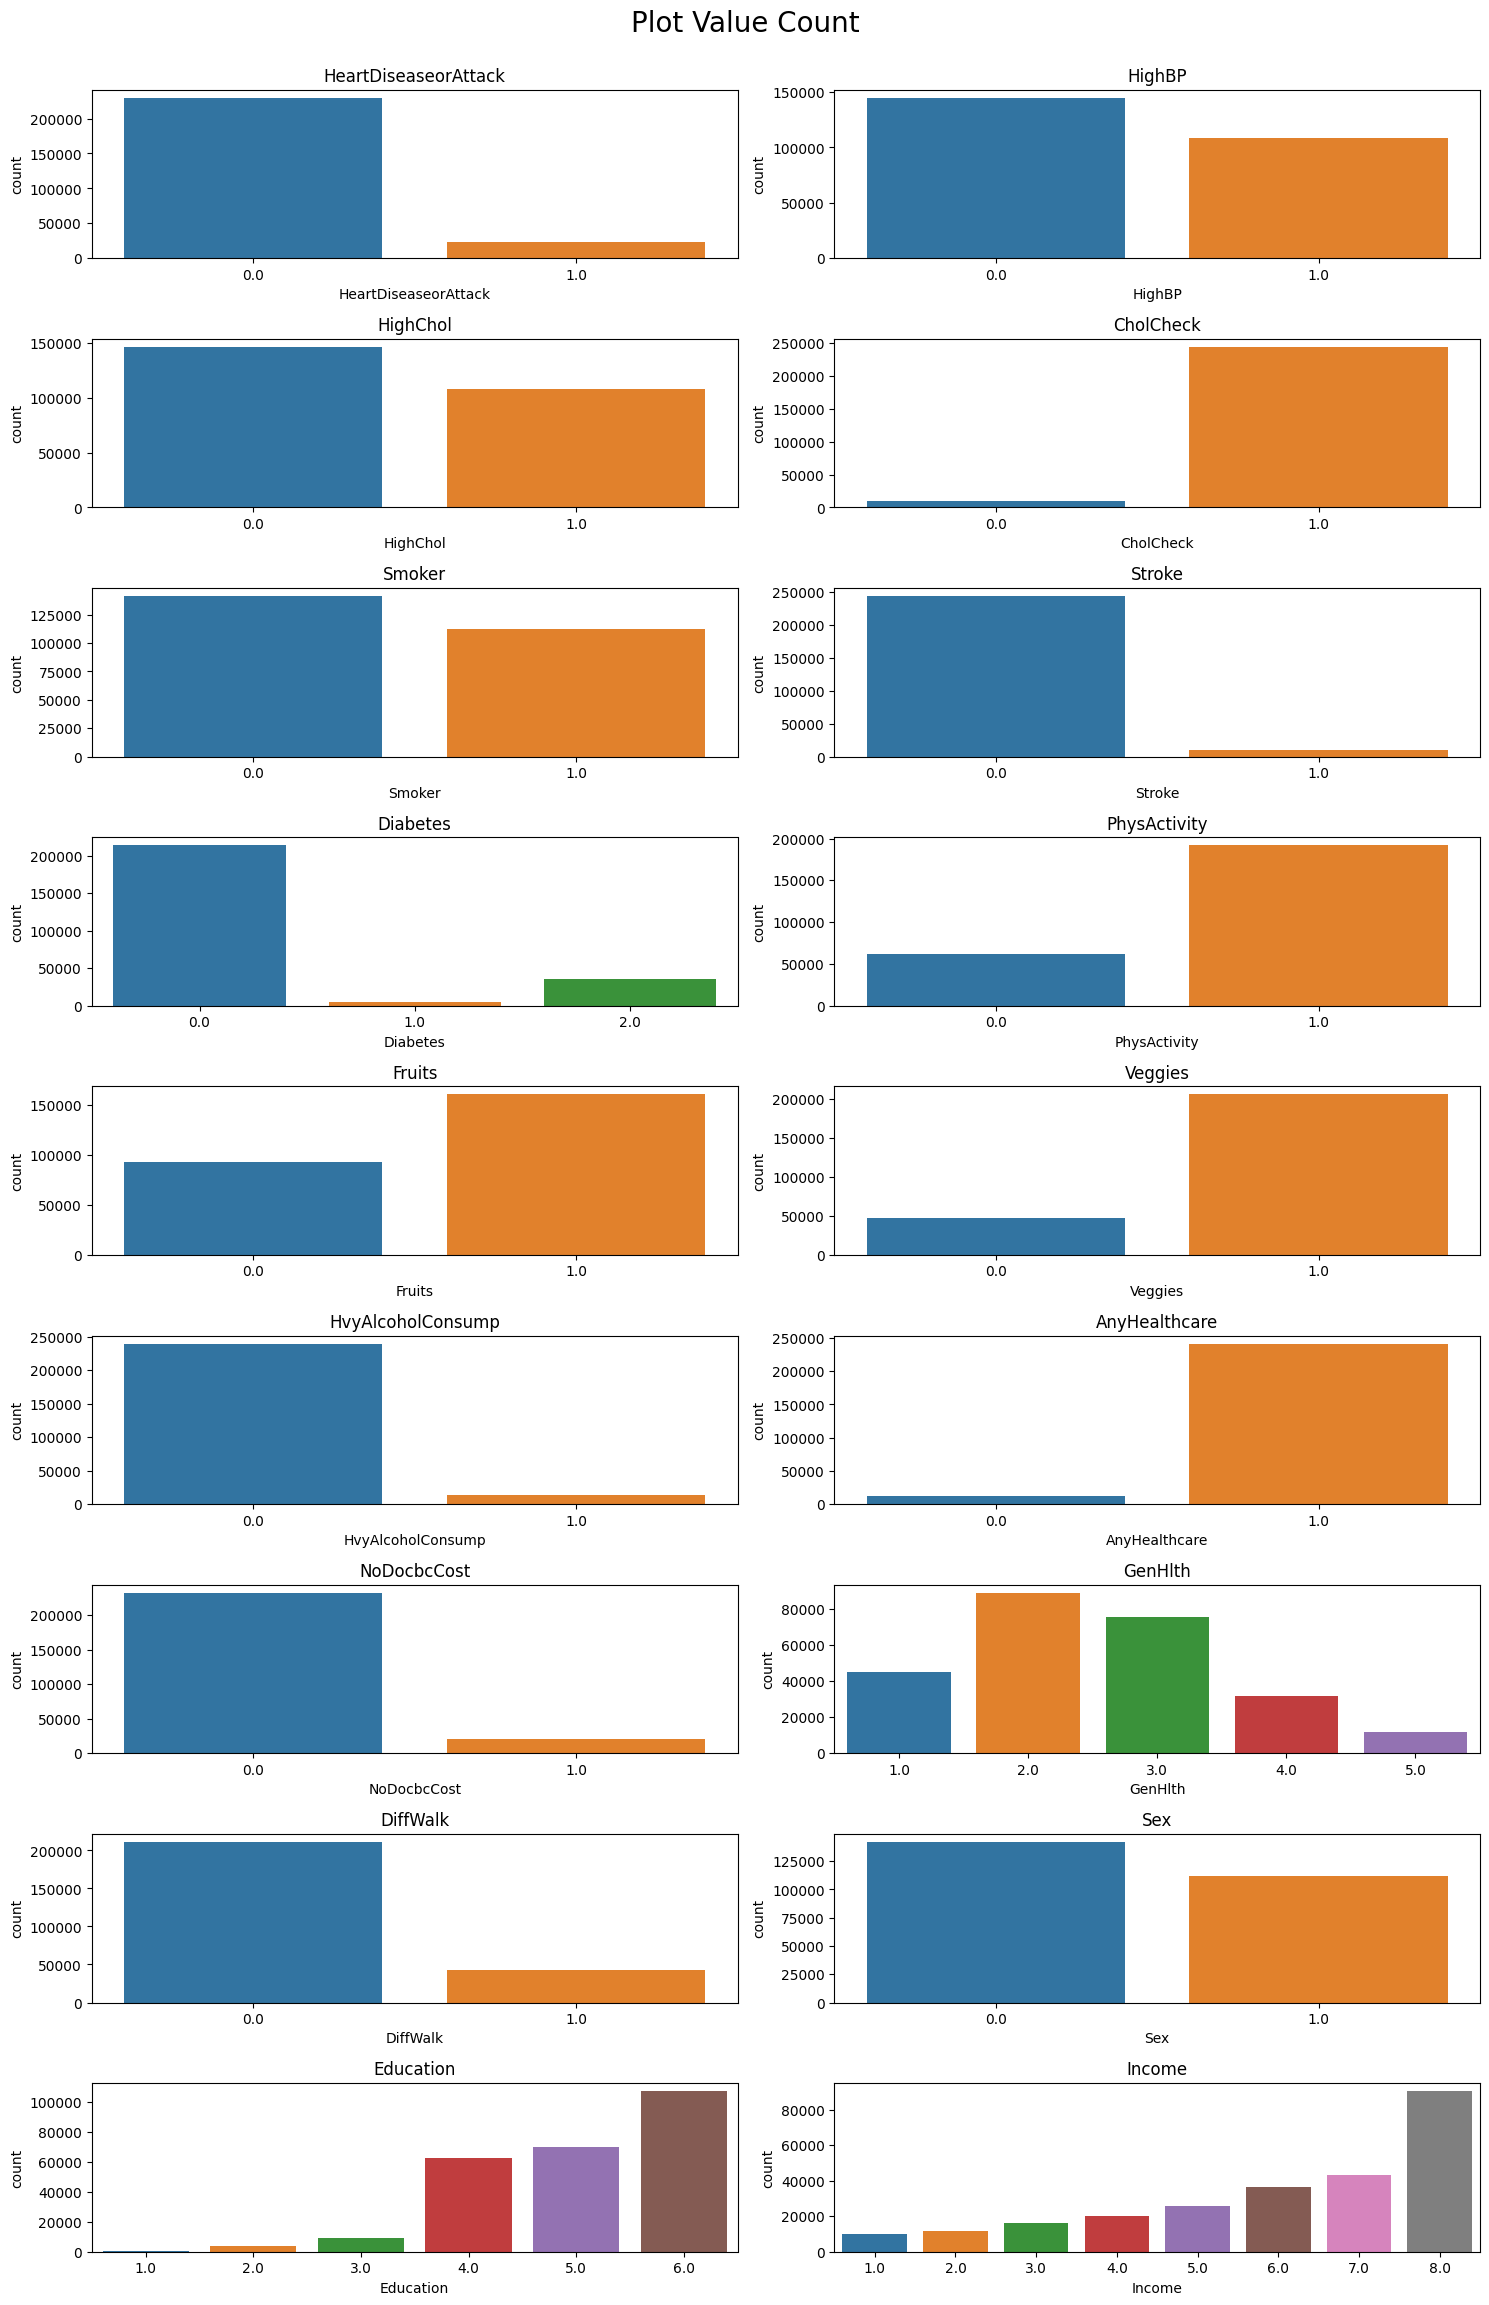

In [ ]:
features = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education',
       'Income']

plt.figure(figsize=(15,45))
for i,column in enumerate(features):
    plt.subplot(len(features), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

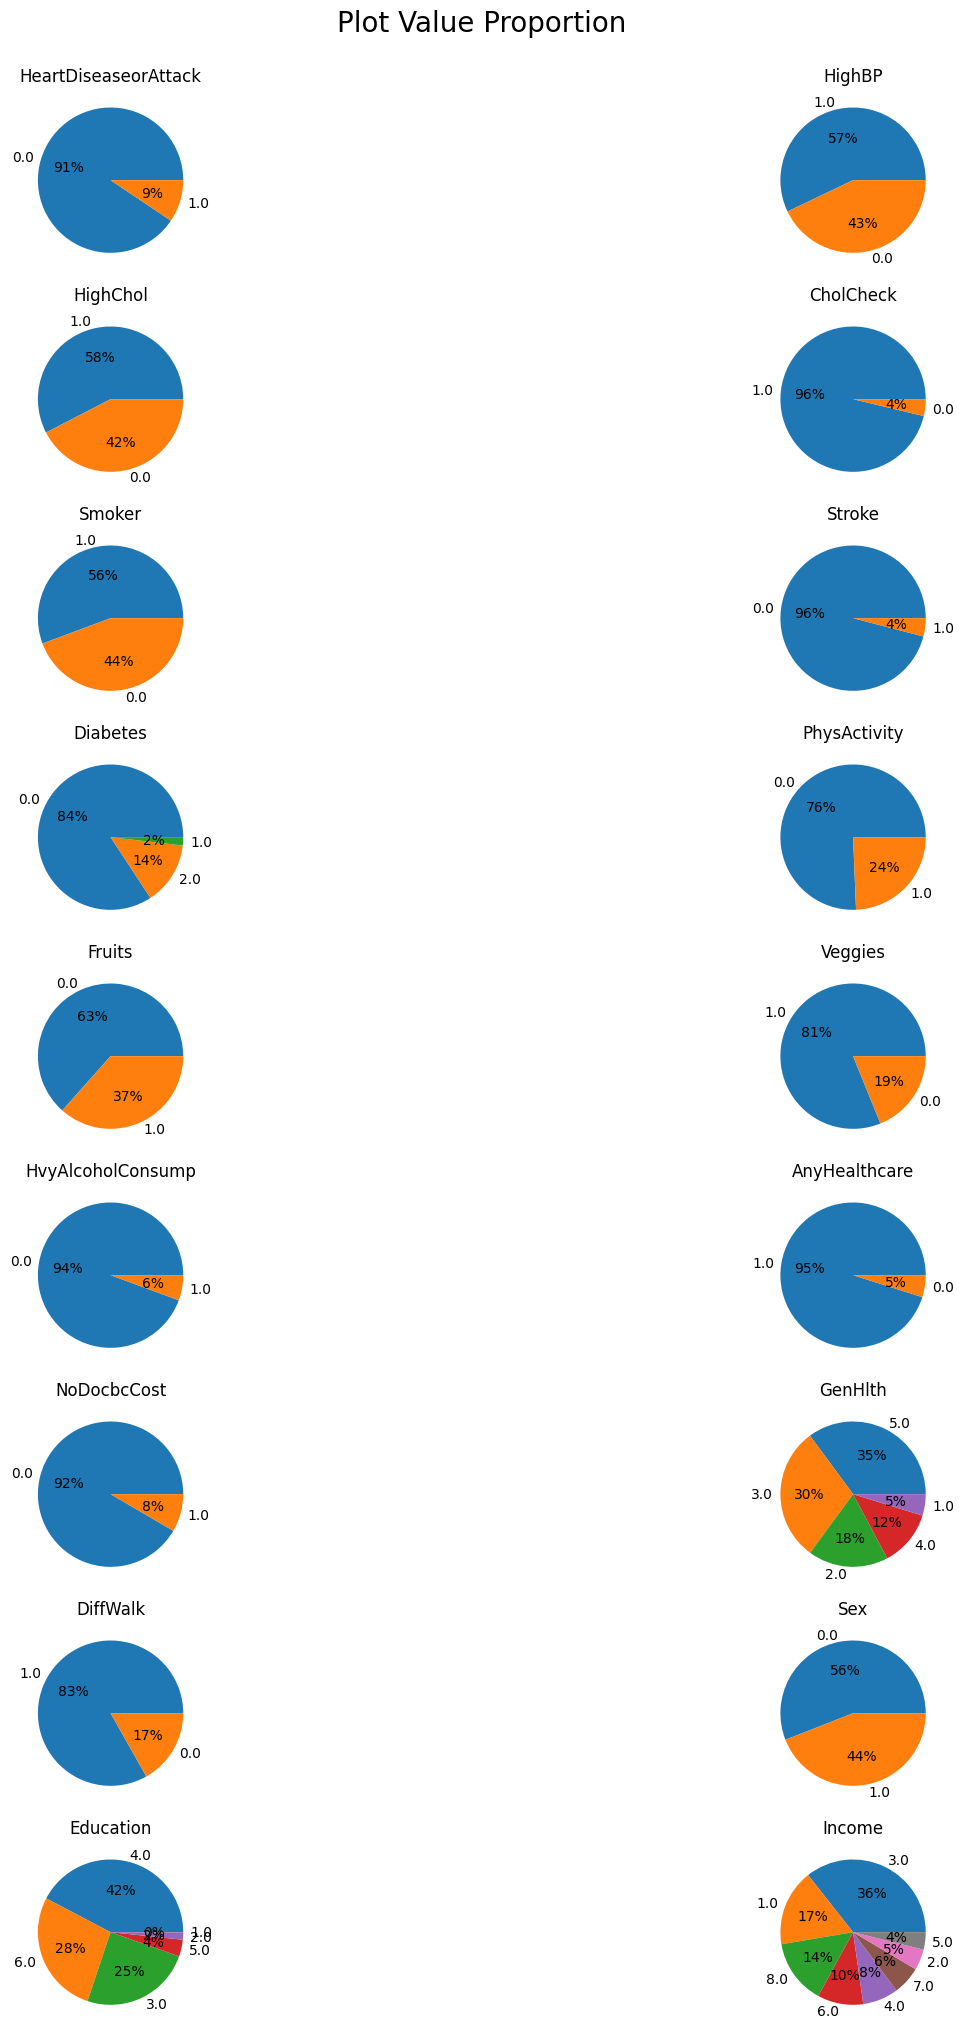

In [ ]:
# Understanding the variance in data using Pie charts
plt.figure(figsize=(15,40))
for i,column in enumerate(features):
    plt.subplot(len(features), 2, i+1)
    plt.suptitle("Plot Value Proportion", fontsize=20, x=0.5, y=1)
    plt.pie(x=df[column].value_counts(), labels=df[column].unique(), autopct='%.0f%%')
    plt.title(f"{column}")
    plt.tight_layout()

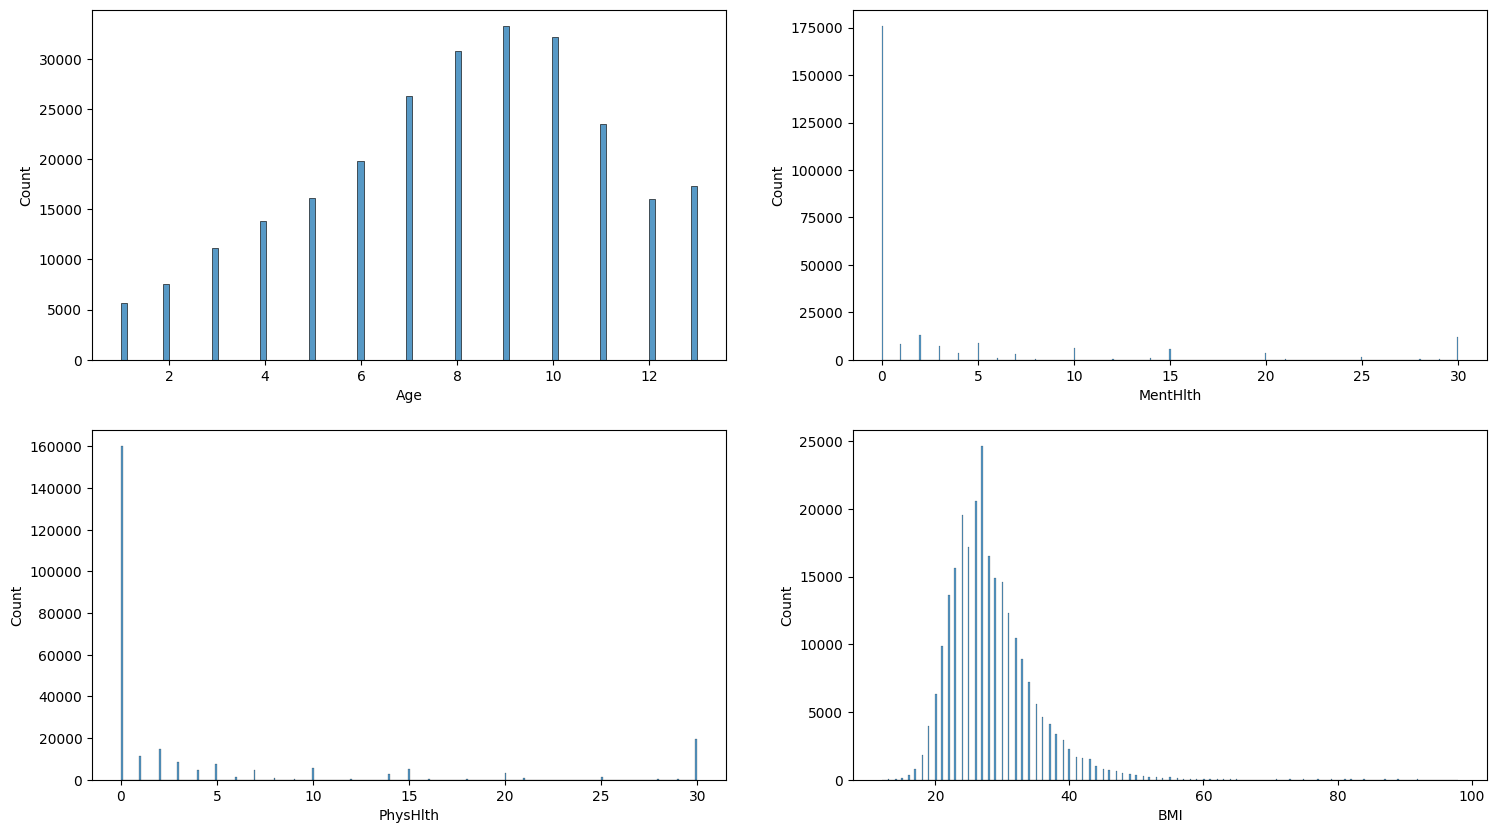

In [ ]:
# Analyzing columns with wider range of values
other = ['Age', 'MentHlth', 'PhysHlth', 'BMI']
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0,0], data=df, x=other[0])
sns.histplot(ax=axes[0,1], data=df, x=other[1])
sns.histplot(ax=axes[1,0], data=df, x=other[2])
sns.histplot(ax=axes[1,1], data=df, x=other[3]);

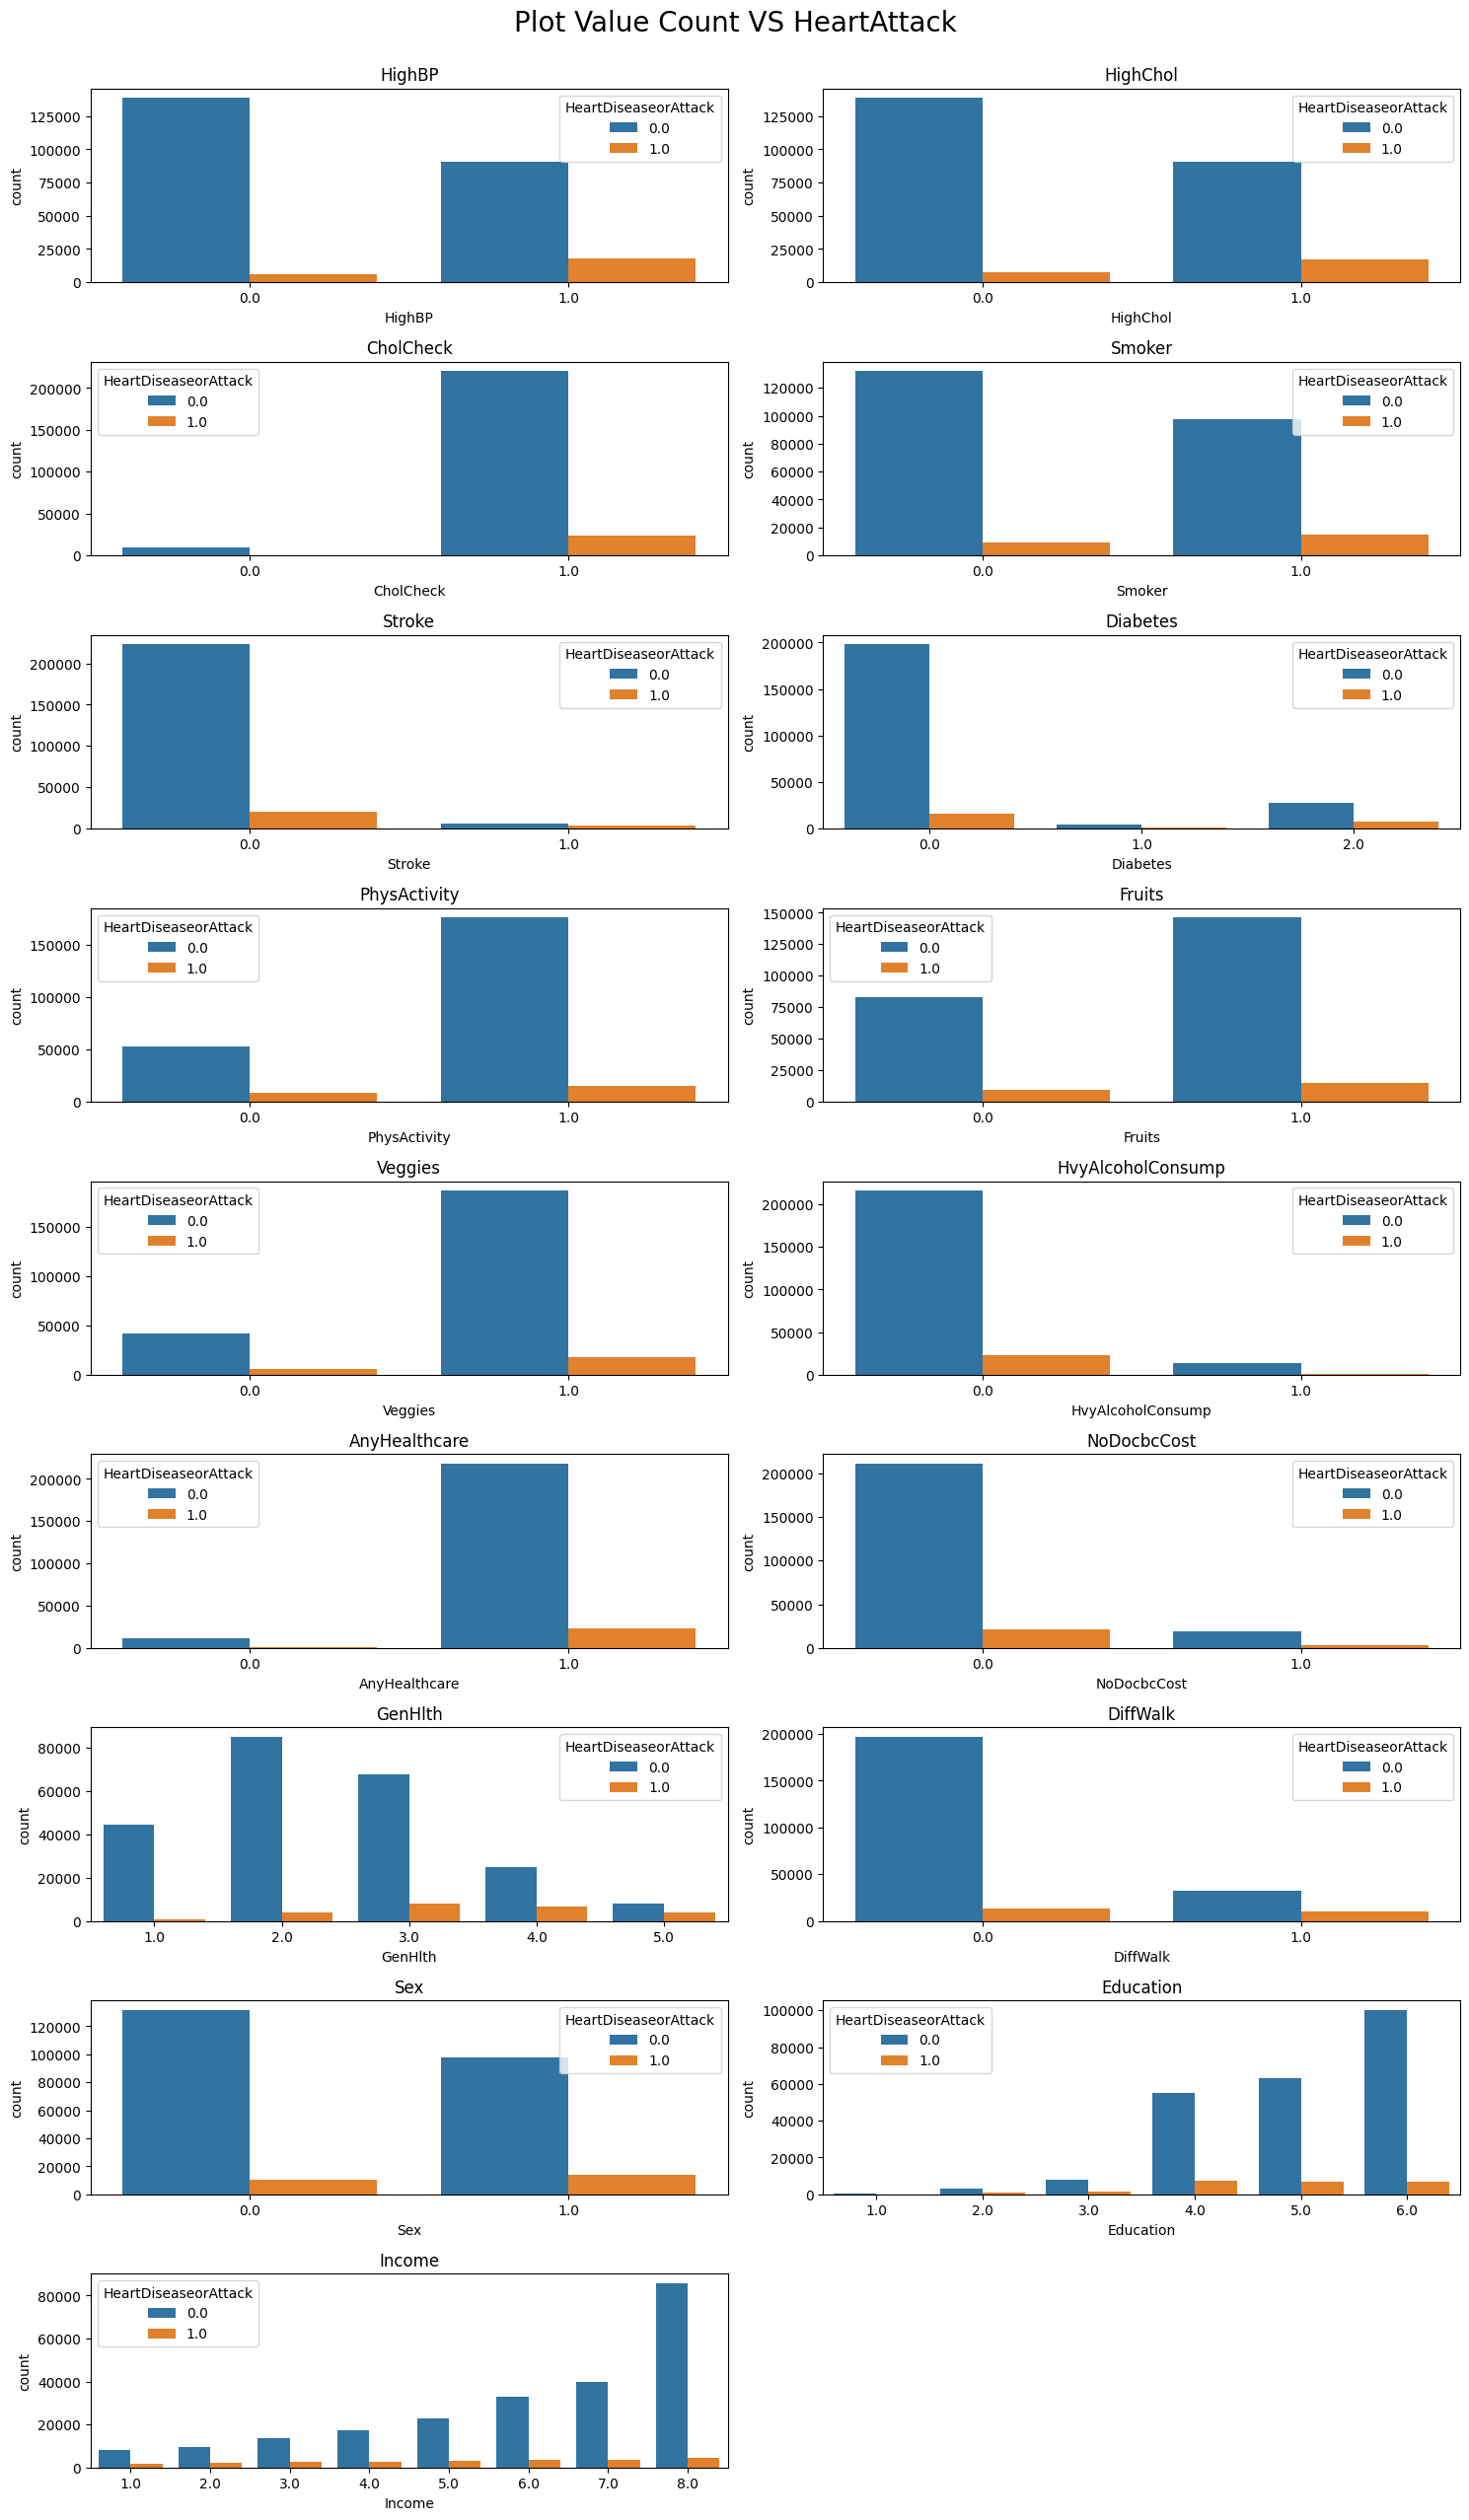

In [ ]:
# Plotting columns with small range values with respect to heart diseases to understand the count.
plt.figure(figsize=(15,50))
for i,column in enumerate(features[1:]):
    plt.subplot(len(features), 2, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='HeartDiseaseorAttack')
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:
bincol = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
         'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

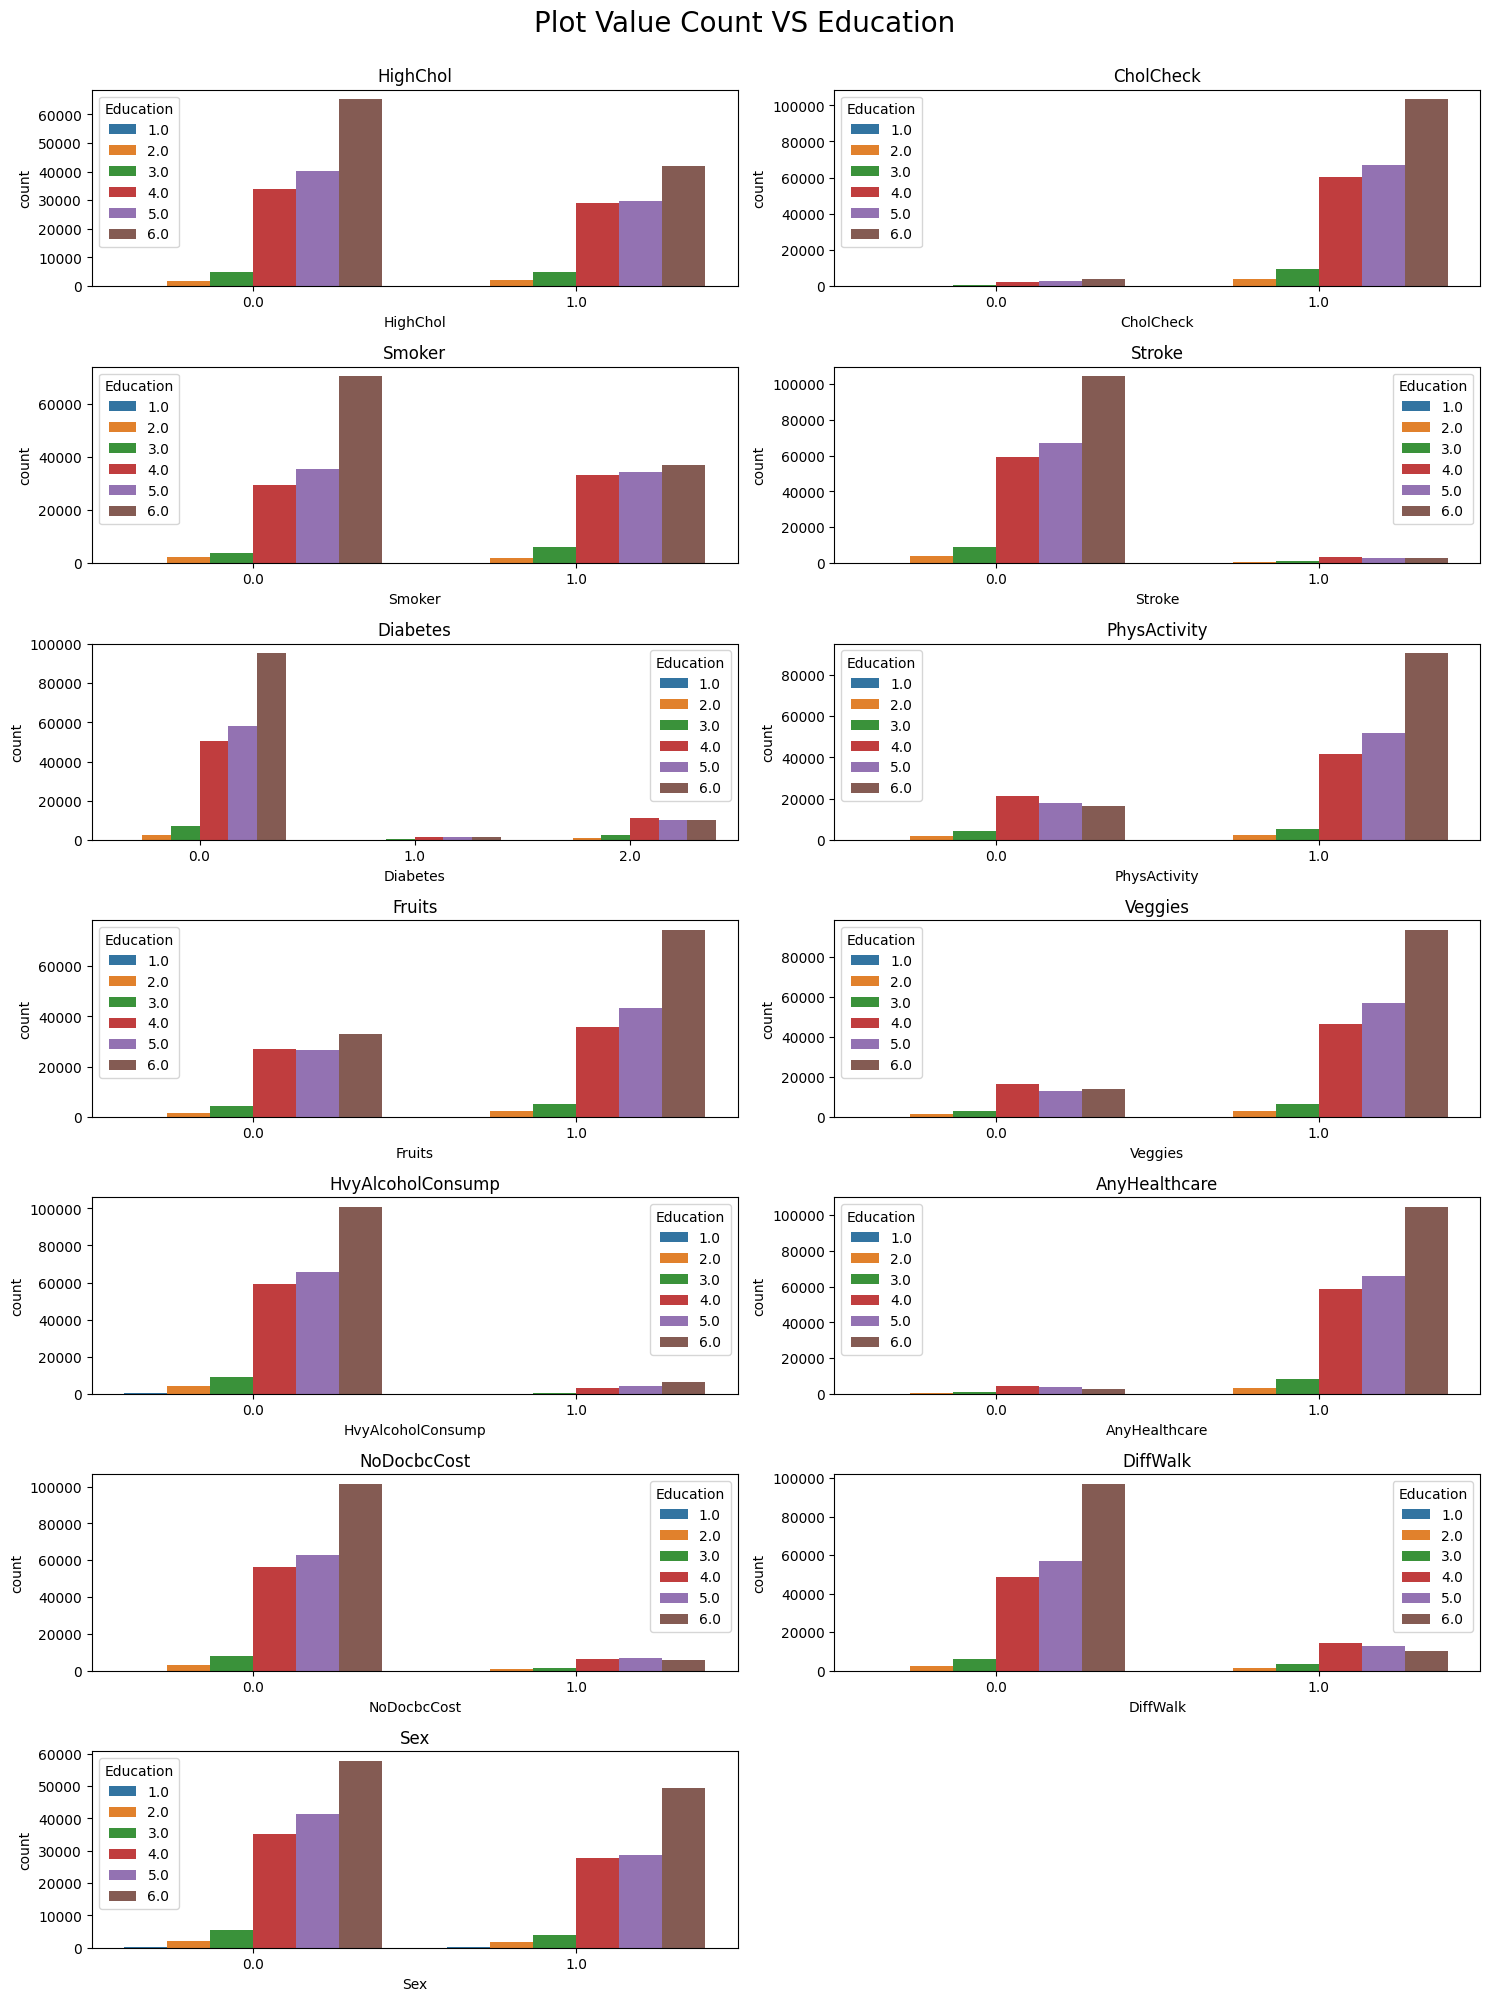

In [ ]:
# Plotting different columns against education to understand how education impacts heart disease among people
plt.figure(figsize=(15,50))
for i,column in enumerate(bincol[1:]):
    plt.subplot(len(features), 2, i+1)
    plt.suptitle("Plot Value Count VS Education", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='Education')
    plt.title(f"{column}")
    plt.tight_layout()

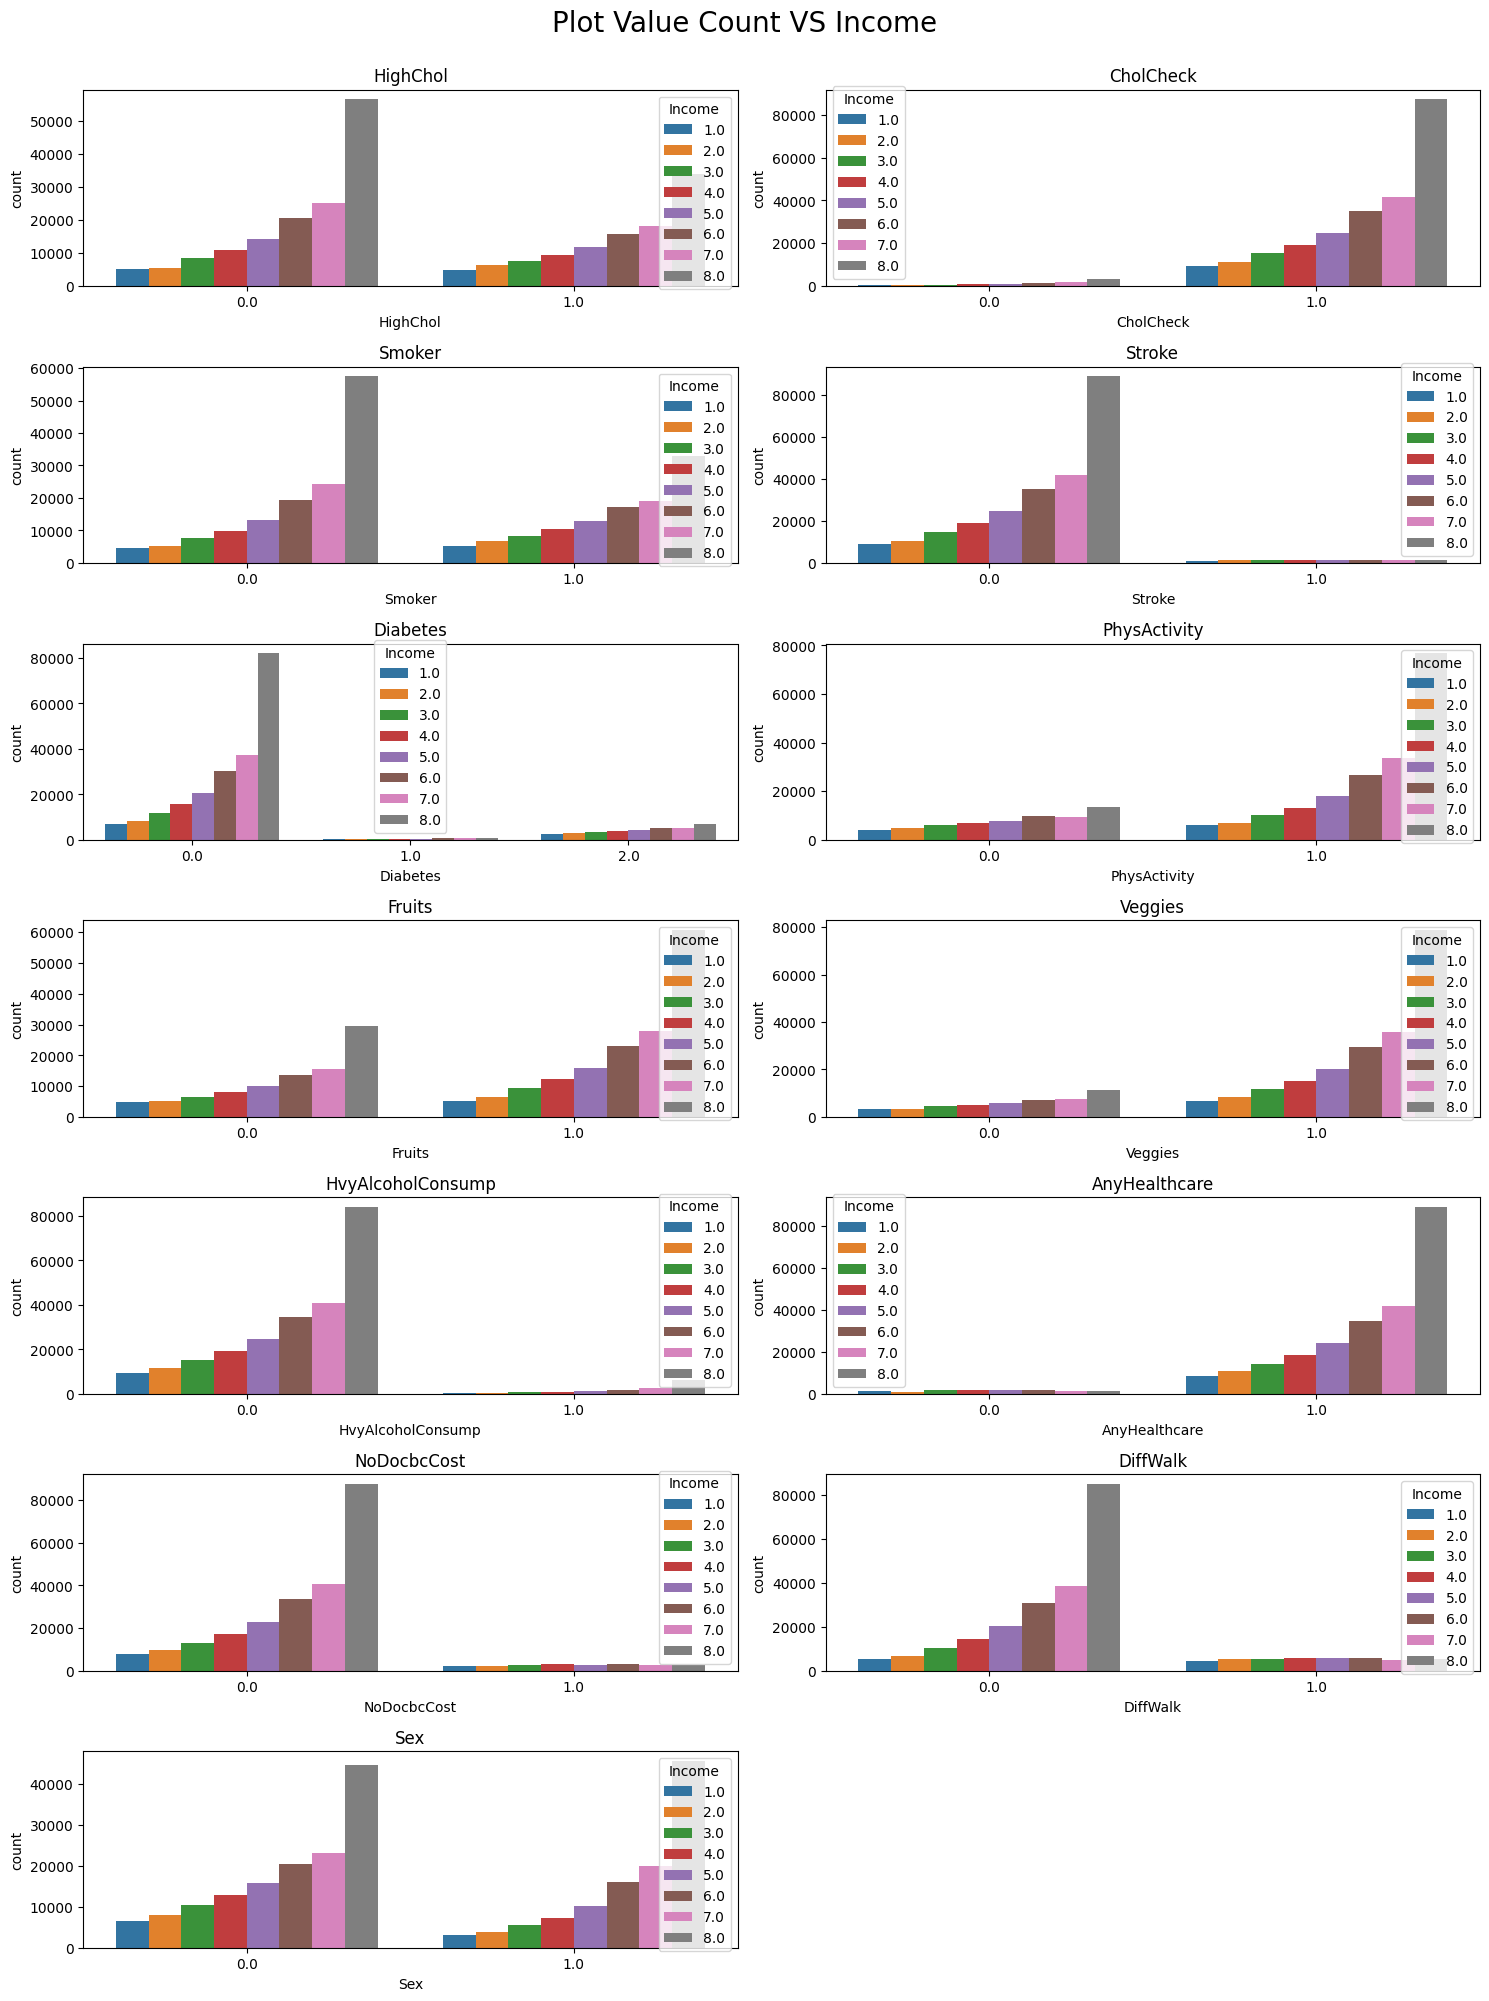

In [ ]:
# Plotting various columns against income to understand the impact it has on heart diseases among people
plt.figure(figsize=(15,50))
for i,column in enumerate(bincol[1:]):
    plt.subplot(len(features), 2, i+1)
    plt.suptitle("Plot Value Count VS Income", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='Income')
    plt.title(f"{column}")
    plt.tight_layout()

## Feature Engineering
Due to the class imbalance in our dataset we are going to consider the following approches:
1. Under Sampling
2. Over Sampling

***Under Sampling***

Here we balance the classes by reducing the records of the prominent class to the comparitive length of lesser class

In [ ]:
# Preparing data for under sampling
df.drop([ 'Education', 'Income'], axis=1)

positive = len(df[df['HeartDiseaseorAttack'] == 1])
negetive = df[df.HeartDiseaseorAttack == 0].index
random_indices = np.random.choice(negetive,positive, replace=False)
disease_indices = df[df.HeartDiseaseorAttack == 1].index
under_sample_indices = np.concatenate([disease_indices,random_indices])
under_sample = df.loc[under_sample_indices]
under_sample

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
20,1.0,1.0,1.0,1.0,22.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,30.0,0.0,1.0,0.0,12.0,4.0,4.0
26,1.0,1.0,1.0,1.0,37.0,1.0,1.0,2.0,0.0,0.0,...,1.0,0.0,5.0,0.0,0.0,1.0,1.0,10.0,6.0,5.0
27,1.0,1.0,1.0,1.0,28.0,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,2.0,4.0
47,1.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,1.0,0.0,0.0,1.0,10.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220660,0.0,0.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,7.0
242874,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
22095,0.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,10.0,6.0,7.0
10844,0.0,1.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,5.0,7.0,0.0,1.0,1.0,5.0,1.0


In [ ]:
#Shuffling the data
under_sample.sample(frac=1)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
170545,0.0,0.0,1.0,1.0,22.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,3.0,25.0,5.0,1.0,0.0,1.0,4.0,8.0
196041,1.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,2.0
62101,1.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,4.0,6.0
31638,0.0,1.0,0.0,1.0,43.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,5.0,6.0
84933,1.0,1.0,1.0,1.0,28.0,1.0,1.0,2.0,0.0,0.0,...,1.0,0.0,5.0,7.0,30.0,1.0,0.0,9.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215049,0.0,1.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,5.0,30.0,0.0,0.0,5.0,6.0,8.0
124261,1.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,0.0,30.0,1.0,1.0,8.0,5.0,5.0
248687,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,4.0,5.0
114637,0.0,1.0,1.0,1.0,59.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,0.0,15.0,0.0,1.0,8.0,5.0,7.0


In [ ]:
len(under_sample['HeartDiseaseorAttack']==1)


47786

In [ ]:
len(under_sample['HeartDiseaseorAttack']==0)

47786

In [ ]:
# MinMaxScaler Under Sampling
for feature in ['BMI', 'MentHlth', 'PhysHlth']:
    under_sample[feature] = under_sample[feature].astype('int64')
    under_sample[feature] = MinMaxScaler(feature_range=(0, 1)).fit_transform(under_sample[[feature]])

## Modelling

In [ ]:
under_sample.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1.0,1.0,1.0,1.0,0.209302,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,1.000000,1.0,1.0,0.0,9.0,5.0,1.0
20,1.0,1.0,1.0,1.0,0.116279,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,1.000000,0.0,1.0,0.0,12.0,4.0,4.0
26,1.0,1.0,1.0,1.0,0.290698,1.0,1.0,2.0,0.0,0.0,...,1.0,0.0,5.0,0.000000,0.0,1.0,1.0,10.0,6.0,5.0
27,1.0,1.0,1.0,1.0,0.186047,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.000000,0.0,0.0,1.0,12.0,2.0,4.0
47,1.0,1.0,1.0,1.0,0.151163,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.033333,0.0,0.0,1.0,10.0,4.0,7.0


In [ ]:
# Split column to Feature(X) and Target(Y) Under Sampling
X=under_sample.drop(['HeartDiseaseorAttack', 'Education', 'Income'], axis=1) #Drop these column
y=under_sample['HeartDiseaseorAttack'] #Target

In [ ]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
8,1.0,1.0,1.0,0.209302,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,1.000000,1.0,1.0,0.0,9.0
20,1.0,1.0,1.0,0.116279,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.000000,0.0,1.0,0.0,12.0
26,1.0,1.0,1.0,0.290698,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,0.000000,0.0,1.0,1.0,10.0
27,1.0,1.0,1.0,0.186047,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.000000,0.0,0.0,1.0,12.0
47,1.0,1.0,1.0,0.151163,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.033333,0.0,0.0,1.0,10.0


Spliting the dataset into train and test with test size of 20%

In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, stratify = y , random_state=48)

In [ ]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
55281,0.0,0.0,1.0,0.127907,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.000000,0.000000,0.0,0.0,8.0
41059,1.0,1.0,1.0,0.197674,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,0.333333,1.000000,0.0,1.0,10.0
137734,1.0,1.0,1.0,0.209302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000,0.666667,0.0,1.0,6.0
211003,0.0,0.0,1.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.166667,0.000000,0.0,0.0,6.0
11910,0.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.000000,0.000000,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40063,0.0,0.0,1.0,0.209302,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.000000,0.000000,1.0,1.0,13.0
41169,1.0,0.0,1.0,0.325581,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.000000,0.000000,0.0,1.0,10.0
230376,1.0,1.0,1.0,0.186047,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,0.166667,0.000000,1.0,0.0,13.0
136121,1.0,1.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.000000,0.066667,1.0,1.0,12.0


In [ ]:
len(X_train)

38228

In [ ]:
len(X_test)

9558

In [ ]:
y_train, len(y_train)

(55281     1.0
 41059     1.0
 137734    0.0
 211003    0.0
 11910     1.0
          ... 
 40063     0.0
 41169     1.0
 230376    1.0
 136121    0.0
 34350     0.0
 Name: HeartDiseaseorAttack, Length: 38228, dtype: float64,
 38228)

Now we build a machine learning models.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 6 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. Ada Boost Classifier
5. Gradient Boosting Classifier
6. CNN


In [ ]:
# Initializing the models and storing them in a list
algorithms = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    algorithms : A dictionary of different Scikit-Learn Machine Learning Models
    X_train : Training Data (Features)
    X_test : Testing Data (Features)
    y_train : Training Labels
    y_test : Testing Labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    algo_scores = {}
    # Loop through models
    for name, algorithm in algorithms.items():
        # Fit the model to the data
        algorithm.fit(X_train, y_train)
        # Evaluate the model and append its score to algo_scores
        algo_scores[name] = algorithm.score(X_test, y_test)
    return algo_scores

In [ ]:
# Running models on over sampled data
algo_scores = fit_and_score(models=algorithms,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

algo_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.764385854781335,
 'KNN': 0.7350910232266165,
 'Random Forest': 0.7486921950198786,
 'Ada Boost': 0.7638627327892865,
 'Gradient Boosting': 0.7666875915463486}

As we see a warning stating:
>"STOP: TOTAL NO. of ITERATIONS REACHED LIMIT."

We will try to increase the number of iterations

In [ ]:
algorithms["Logistic Regression"] = LogisticRegression(solver='lbfgs', max_iter=1000)

algo_scores = fit_and_score(models=algorithms,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

algo_scores

{'Logistic Regression': 0.7654320987654321,
 'KNN': 0.7350910232266165,
 'Random Forest': 0.7486921950198786,
 'Ada Boost': 0.7638627327892865,
 'Gradient Boosting': 0.7666875915463486}

### Model Comparison

---



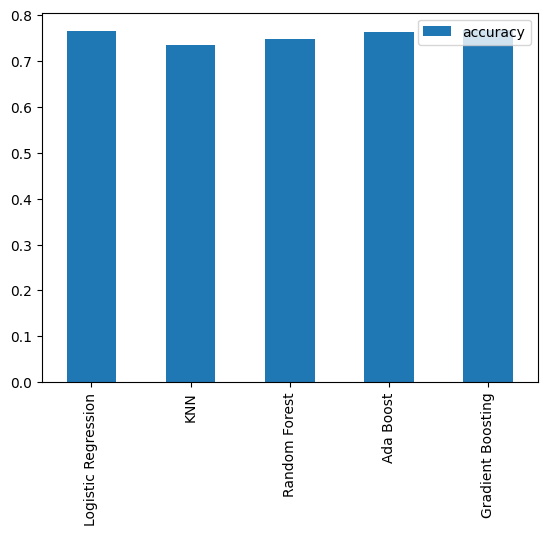

In [ ]:
model_compare = pd.DataFrame(algo_scores, index=["accuracy"])
model_compare.T.plot.bar();

As we can see all the models have performed similarly.

Now we will be trying to improve the performance by following means:
Let's look at the following:

1. Hypyterparameter tuning
2. Confusion matrix
3. Cross-validation
4. Precision
5. Recall
6. F1 score
7. Classification report
8. ROC curve
9. Area under the curve (AUC)


## Hyperparameter tuning

### Hyperparameter tuning with RandomizedSearchCV
We're going to tune:



*   LogisticRegression()
*   Gradiant Boost



... using RandomizedSearchCV

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


# Create a hyperparameter grid for Gradiant Boost
hyperparameter_gradiant = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_leaf': np.arange(1, 20, 2),
    'min_samples_split': np.arange(2, 20, 2),
    'max_features': ['auto', 'sqrt', 'log2']}


Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [ ]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.7656413475622516

RandomizedSearchCV for GradientBoostingClassifier()

In [ ]:
# Setup random seed
np.random.seed(42)


# Set up the random search with 4-fold cross validation
gradientboost = GradientBoostingClassifier()
randomcv_gradiant = RandomizedSearchCV(estimator=gradientboost,
            param_distributions=hyperparameter_gradiant,
            cv=4,
            n_iter=20,
            scoring = 'accuracy',
            n_jobs = 4,
            random_state=42)
randomcv_gradiant.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
randomcv_gradiant.best_params_

In [ ]:
randomcv_gradiant.score(X_test,y_test)

## Hyperparamter Tuning with GridSearchCV
Since our Gradient Boosting model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [ ]:
# Tuning
grid_gradiant = {'learning_rate': [0.1, 0.2],
 'n_estimators': [500,600],
 }

 # Setup grid hyperparameter search for LogisticRegression
gs_grd_bst = GridSearchCV(GradientBoostingClassifier(),
                          param_grid=grid_gradiant,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_grd_bst.fit(X_train, y_train);

Fitting 5 folds for each of 4 candidates, totalling 20 fits


KeyboardInterrupt: ignored

In [ ]:
gs_grd_bst.best_params_

In [ ]:
gs_grd_bst.score(X_test, y_test)

Trying CNN

In [ ]:
model = Sequential()

#normalization
#normalizer

# Adding the input layer and the first hidden layer
model.add(Dense(64,  activation = 'relu', input_dim = 19 ))

#Adding dropout layer
model.add(Dropout(0.20))

#model.add(Dense(units=64, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
# Adding the second hidden layer
#model.add(Dense(64, kernel_regularizer=regularizers.l1(0.01), activation = 'relu'))

# Adding the second hidden layer
model.add(Dense(64, activation = 'relu' ))


#Adding dropout layer
model.add(Dropout(0.40))

# Adding the output layer
model.add(Dense(1,  activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the Model

In [ ]:
# Fitting the model
h = model.fit(X_train, y_train, epochs = 30, validation_split = 0.2 )

Epoch 1/30
956/956 [==============================] - 10s 4ms/step - loss: 0.5578 - accuracy: 0.7154 - val_loss: 0.4976 - val_accuracy: 0.7629
Epoch 2/30
956/956 [==============================] - 5s 5ms/step - loss: 0.5077 - accuracy: 0.7562 - val_loss: 0.4903 - val_accuracy: 0.7662
Epoch 3/30
956/956 [==============================] - 3s 4ms/step - loss: 0.5018 - accuracy: 0.7606 - val_loss: 0.4917 - val_accuracy: 0.7660
Epoch 4/30
956/956 [==============================] - 4s 4ms/step - loss: 0.4957 - accuracy: 0.7648 - val_loss: 0.4830 - val_accuracy: 0.7685
Epoch 5/30
956/956 [==============================] - 4s 4ms/step - loss: 0.4922 - accuracy: 0.7659 - val_loss: 0.4956 - val_accuracy: 0.7639
Epoch 6/30
956/956 [==============================] - 4s 4ms/step - loss: 0.4911 - accuracy: 0.7675 - val_loss: 0.4810 - val_accuracy: 0.7685
Epoch 7/30
956/956 [==============================] - 4s 4ms/step - loss: 0.4909 - accuracy: 0.7669 - val_loss: 0.4803 - val_accuracy: 0.7719
Epoch

Performance and evaluation for CNN

Instructions:

* Show the training and validation loss and accuracy plots
* Interpret the loss and accuracy plots (e.g. is there under- or over-fitting)
* Describe the final performance of the model with test set

In [ ]:
h_dict = h.history
h_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Plotting Loss
def plot_loss(h):

    plt.plot(h.history['loss'], label='train')
    plt.plot(h.history['val_loss'], label='validation')
    plt.title('Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

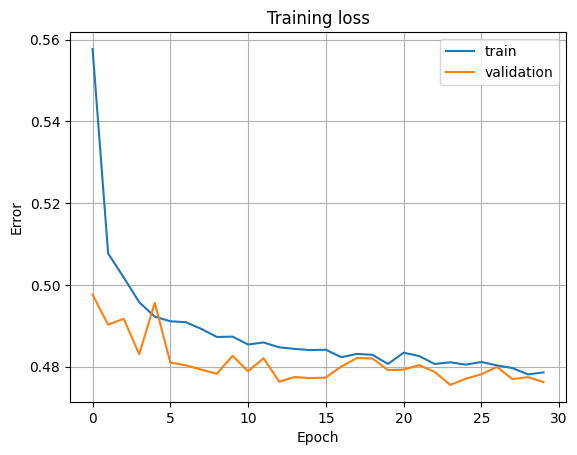

In [ ]:
plot_loss(h)

In [ ]:
# Plotting Accuracy
def plot_accuracy(h):

    plt.plot(h.history['accuracy'], label='train')
    plt.plot(h.history['val_accuracy'], label='validation')
    #plt.ylim([0, 10])
    plt.title('Training accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

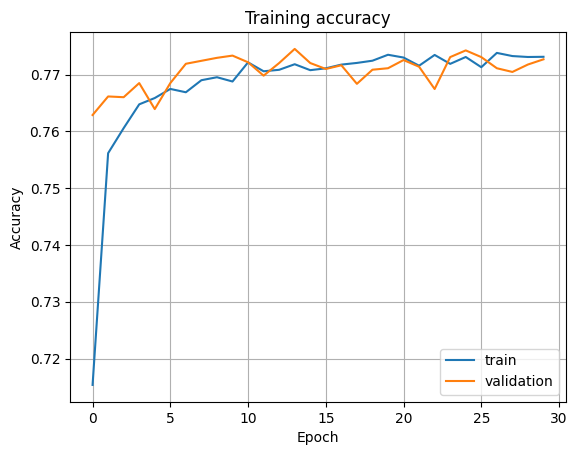

In [ ]:
plot_accuracy(h)

In [ ]:
%%time
test_results = model.evaluate(X_test, y_test, verbose=0)
test_results
print(f"Test results (error):    {test_results[0]:.3f}")
print(f"Test results (accuracy): {test_results[1]:.3f}")

Test results (error):    0.490
Test results (accuracy): 0.763
CPU times: user 688 ms, sys: 60.8 ms, total: 749 ms
Wall time: 693 ms


299/299 [==============================] - 1s 2ms/step
accuracy of the model:  0.7630257376020088
sensitivity of the model:  0.6911487758945386
specificity of the model:  0.834902699309479


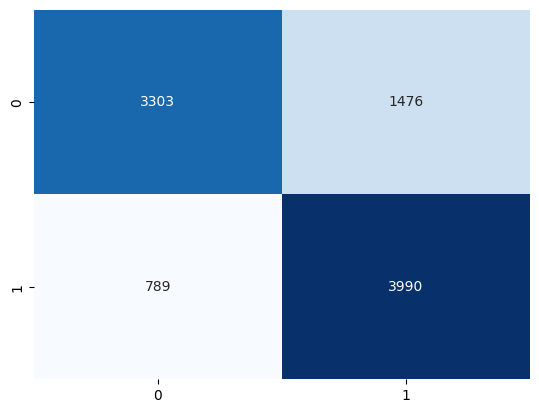

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('accuracy of the model: ',ac)
print('sensitivity of the model: ',sensitivity)
print('specificity of the model: ',specificity)

In [ ]:
# Displaying classification report
cr = classification_report(y_test , y_pred.round())
print(cr)

              precision    recall  f1-score   support

         0.0       0.81      0.69      0.74      4779
         1.0       0.73      0.83      0.78      4779

    accuracy                           0.76      9558
   macro avg       0.77      0.76      0.76      9558
weighted avg       0.77      0.76      0.76      9558



## Evaluting our tuned machine learning classifier, beyond accuracy
- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

As among all the classification models Gradiant Boost permormed the best in terms of accuracy so we will further explore other evaluation metrics on it

In [ ]:
# Make predictions with tuned model
y_preds = gs_grd_bst.predict(X_test)

NotFittedError: ignored

In [ ]:
y_test

In [ ]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(gs_grd_bst, X_test, y_test)
plt.show()

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [ ]:
print(classification_report(y_test, y_preds))

## Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [ ]:
# Check best hyperparameters
gs_grd_bst.best_params_

In [ ]:
# Create a new classifier with best parameters
clf = GradientBoostingClassifier(learning_rate = 0.01,
                         max_depth= 5,
                         max_features = 'log2',
                         min_samples_leaf = 19,
                         min_samples_split = 2,
                         n_estimators = 150)

In [ ]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

##*Over Sampling*
Here we scale the less prominent class to the length of the prominant class by duplicating records.

In [ ]:
# Preparing data for Over Sampling
# MinMaxScaler Over sampling
for feature in ['BMI', 'MentHlth', 'PhysHlth']:
    df[feature] = df[feature].astype('int64')
    df[feature] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[[feature]])

In [ ]:
# Split column to Feature(X) and Target(Y) Over Sampling
X=df.drop(['HeartDiseaseorAttack', 'Education', 'Income'], axis=1) #Drop these column
y=df['HeartDiseaseorAttack'] #Target

In [ ]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,0.6,0.5,1.0,0.0,9.0
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0,9.0
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.1,0.0,0.0,0.0,11.0


Spliting the dataset into train and test with test size of 20%

In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, stratify = y , random_state=48)

In [ ]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
167862,1.0,0.0,1.0,0.104651,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.000000,1.000000,1.0,0.0,9.0
195897,0.0,1.0,1.0,0.186047,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,1.000000,0.500000,0.0,0.0,9.0
142282,0.0,0.0,1.0,0.255814,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,0.000000,1.000000,1.0,0.0,11.0
242909,0.0,0.0,1.0,0.348837,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.000000,0.000000,0.0,0.0,8.0
79211,0.0,0.0,1.0,0.244186,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.466667,0.133333,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206940,1.0,0.0,1.0,0.255814,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.000000,0.000000,0.0,0.0,12.0
120709,1.0,1.0,1.0,0.174419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.000000,1.000000,1.0,0.0,13.0
234670,1.0,0.0,1.0,0.313953,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.000000,0.000000,0.0,0.0,9.0
147774,1.0,0.0,1.0,0.232558,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,0.233333,0.000000,0.0,0.0,10.0


In [ ]:
y_train, len(y_train)

(167862    0.0
 195897    0.0
 142282    0.0
 242909    0.0
 79211     0.0
          ... 
 206940    1.0
 120709    1.0
 234670    0.0
 147774    0.0
 181034    0.0
 Name: HeartDiseaseorAttack, Length: 202944, dtype: float64,
 202944)

In [ ]:
# Over Sampling of the training data set
random_sampler = RandomOverSampler()
features_resampled, labels_resampled = random_sampler.fit_resample(X_train, y_train)

print('Resampled data')
# print(f'Disease cases: {sum(labels_resampled):8d}')
# print(f'Healthy cases: {sum(~labels_resampled):8d}')
print(len(labels_resampled))

Resampled data
367660


In [ ]:
# Running models on over sampled data
algo_scores = fit_and_score(models=algorithms,
                             X_train=features_resampled,
                             X_test=X_test,
                             y_train=labels_resampled,
                             y_test=y_test)

algo_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7529564806054873,
 'KNN': 0.8083017975402081,
 'Random Forest': 0.8639427625354777,
 'Ada Boost': 0.7539025543992431,
 'Gradient Boosting': 0.7399282560706402}

As we saw a warning earlier stating:
>"STOP: TOTAL NO. of ITERATIONS REACHED LIMIT."

We will try to increase the number of iterations

In [ ]:
algorithms["Logistic Regression"] = LogisticRegression(solver='lbfgs', max_iter=1000)

algo_scores = fit_and_score(models=algorithms,
                             X_train=features_resampled,
                             X_test=X_test,
                             y_train=labels_resampled,
                             y_test=y_test)

algo_scores

KeyboardInterrupt: ignored

### Model Comparison

---

In [ ]:
model_compare = pd.DataFrame(algo_scores, index=["accuracy"])
model_compare.T.plot.bar();

As we can see all the models have performed similarly.

Now we will be trying to improve the performance by following means:
Let's look at the following:

1. Hypyterparameter tuning
2. Confusion matrix
3. Cross-validation
4. Precision
5. Recall
6. F1 score
7. Classification report
8. ROC curve
9. Area under the curve (AUC)


## Hyperparameter tuning with RandomizedSearchCV
We're going to tune:



*   LogisticRegression()
*   RandomForestClassifier()



... using RandomizedSearchCV

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [ ]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(features_resampled, labels_resampled)

In [ ]:
rs_log_reg.best_params_

In [ ]:
rs_log_reg.score(X_test, y_test)

Now we've tuned LogisticRegression(), let's try RandomizedSearchCv for RandomForestClassifier()...

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=10,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(features_resampled, labels_resampled)

In [ ]:
# Find the best hyperparameters
rs_rf.best_params_

In [ ]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

CNN

In [ ]:
model = Sequential()

#normalization
#normalizer

# Adding the input layer and the first hidden layer
model.add(Dense(64,  activation = 'relu', input_dim = 19 ))

#Adding dropout layer
model.add(Dropout(0.20))

# Adding the second hidden layer
model.add(Dense(64, activation = 'relu' ))


#Adding dropout layer
model.add(Dropout(0.40))

# Adding the output layer
model.add(Dense(1,  activation = 'sigmoid'))

model.summary()
##
# Compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
# Compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the CNN model on over sampled data
h = model.fit(features_resampled, labels_resampled, epochs = 30, validation_split = 0.2 )

In [ ]:
h_dict = h.history
h_dict.keys()

In [ ]:
# Plotting loss
def plot_loss(h):

    plt.plot(h.history['loss'], label='train')
    plt.plot(h.history['val_loss'], label='validation')
    plt.title('Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)


In [ ]:
plot_loss(h)

In [ ]:
# Plot Accuracy
def plot_accuracy(h):

    plt.plot(h.history['accuracy'], label='train')
    plt.plot(h.history['val_accuracy'], label='validation')
    #plt.ylim([0, 10])
    plt.title('Training accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

In [ ]:
plot_accuracy(h)

In [ ]:
%%time
test_results = model.evaluate(X_test, y_test, verbose=0)
test_results
print(f"Test results (error):    {test_results[0]:.3f}")
print(f"Test results (accuracy): {test_results[1]:.3f}")

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

ac=accuracy_score(y_test, y_pred.round())
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('accuracy of the model: ',ac)
print('sensitivity of the model: ',sensitivity)
print('specificity of the model: ',specificity)


In [ ]:
# Classification Report
cr = classification_report(y_test , y_pred.round())
print(cr)

## Evaluting our tuned machine learning classifier, beyond accuracy
- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

As we saw that Random Forest Classifier worked better without the hyperparameter tuning so futher evaluation the basic model on other metrics

In [ ]:
rf = RandomForestClassifier().fit(features_resampled, labels_resampled)

In [ ]:
# Make predictions with tuned model
y_preds = rf.predict(X_test)

In [ ]:
y_test

In [ ]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(rs_rf, X_test, y_test)
plt.show()

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [ ]:
print(classification_report(y_test, y_preds))

## Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [ ]:
clf = RandomForestClassifier()

In [ ]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         features_resampled,
                         labels_resampled,
                         cv=5,
                         scoring="accuracy")
cv_acc

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(rf,
                         features_resampled,
                         labels_resampled,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(rf,
                         features_resampled,
                         labels_resampled,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
# Cross-validated f1-score
cv_f1 = cross_val_score(rf,
                         features_resampled,
                         labels_resampled,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);